In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc 
import numpy as np

On va créer des datasets pour chaque candidats :

In [45]:
df = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')
df0 = df[['Code du département', 'Libellé du département', 'Code de la commune', 'Libellé de la commune', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]
df_AN = df[['Sexe.AN', 'Nom.AN', 'Prénom.AN', 'Voix.AN', '% Voix/Ins.AN', '% Voix/Exp.AN']]
df_RF = df[['Sexe.RF', 'Nom.RF', 'Prénom.RF', 'Voix.RF', '% Voix/Ins.RF', '% Voix/Exp.RF']]
df_ME = df[['Sexe.ME', 'Nom.ME', 'Prénom.ME', 'Voix.ME', '% Voix/Ins.ME', '% Voix/Exp.ME']]
df_LJ = df[['Sexe.LJ', 'Nom.LJ', 'Prénom.LJ', 'Voix.LJ', '% Voix/Ins.LJ', '% Voix/Exp.LJ']]
df_LPM = df[['Sexe.LPM', 'Nom.LPM', 'Prénom.LPM', 'Voix.LPM', '% Voix/Ins.LPM', '% Voix/Exp.LPM']]
df_ZE = df[['Sexe.ZE', 'Nom.ZE', 'Prénom.ZE', 'Voix.ZE', '% Voix/Ins.ZE', '% Voix/Exp.ZE']]
df_MJL = df[['Sexe.MJL', 'Nom.MJL', 'Prénom.MJL', 'Voix.MJL', '% Voix/Ins.MJL', '% Voix/Exp.MJL']]
df_HA = df[['Sexe.HA', 'Nom.HA', 'Prénom.HA', 'Voix.HA', '% Voix/Ins.HA', '% Voix/Exp.HA']]
df_JY = df[['Sexe.JY', 'Nom.JY', 'Prénom.JY', 'Voix.JY', '% Voix/Ins.JY', '% Voix/Exp.JY']]
df_PV = df[['Sexe.PV', 'Nom.PV', 'Prénom.PV', 'Voix.PV', '% Voix/Ins.PV', '% Voix/Exp.PV']]
df_PP = df[['Sexe.PP', 'Nom.PP', 'Prénom.PP', 'Voix.PP', '% Voix/Ins.PP', '% Voix/Exp.PP']]
df_DAN = df[['Sexe.DAN', 'Nom.DAN', 'Prénom.DAN', 'Voix.DAN', '% Voix/Ins.DAN', '% Voix/Exp.DAN']]

c:\Users\hedil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print("Nombre de variables dans le dataset général : ", df.shape[1])
print("Nombre d'observations dans le dataset général : ", df.shape[0])

print("Nombre de variables dans le dataset 0 : ", df0.shape[1])
print("Nombre d'observations dans le dataset 0 : ", df0.shape[0])

print("Nombre de variables dans un dataset candidat : ", df_AN.shape[1])
print("Nombre d'observations dans un dataset candidat : ", df_AN.shape[0])

Nombre de variables dans le dataset général :  105
Nombre d'observations dans le dataset général :  69681
Nombre de variables dans le dataset 0 :  21
Nombre d'observations dans le dataset 0 :  69681
Nombre de variables dans un dataset candidat :  7
Nombre d'observations dans un dataset candidat :  69681


On calcule le nombre d'inscrits, de participants et de personnes s'étant abstenues :

Nombre d'inscrits :  48747231
Nombre de votes exprimés :  35132427
Nombre d'abstentionnistes :  12824061
Nombre de votes blancs :  543593
Nombre de votes nuls :  247150


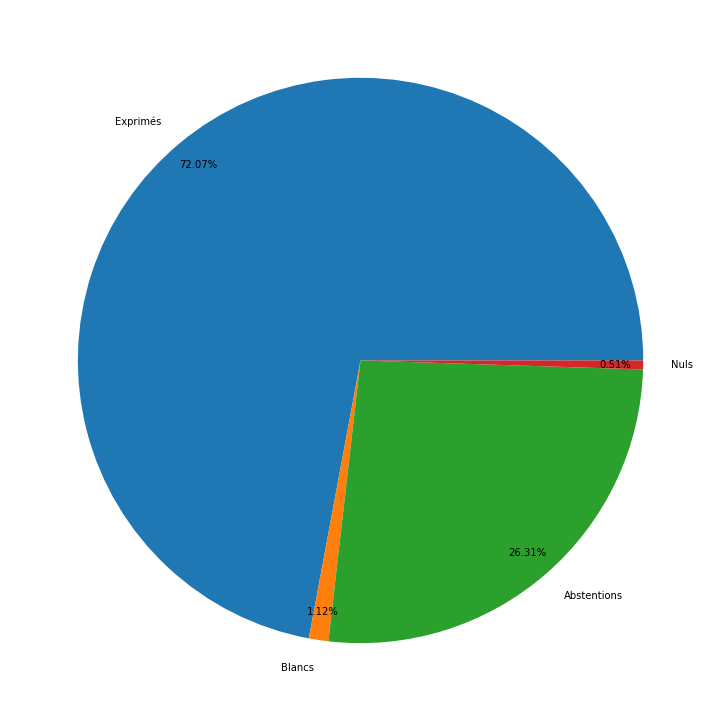

In [44]:
#Stats générales : 

totalIns = np.sum(df['Inscrits'])
totalExp = np.sum(df['Exprimés'])
totalBlanc = np.sum(df['Blancs'])
totalAbs = np.sum(df['Abstentions'])
TotalNuls = np.sum(df['Nuls'])

print("Nombre d'inscrits : ", totalIns)
print("Nombre de votes exprimés : ", totalExp)
print("Nombre d'abstentionnistes : ", totalAbs)
print("Nombre de votes blancs : ", totalBlanc)
print("Nombre de votes nuls : ", TotalNuls)

statParticipation = np.array([totalExp, totalBlanc, totalAbs, TotalNuls])

labelParticipation = ['Exprimés', 'Blancs', 'Abstentions', 'Nuls']

camembertDepObs = plt.pie(statParticipation, labels=labelParticipation, normalize = True, autopct = lambda statParticipation: str(round(statParticipation, 2)) + '%', pctdistance=0.9)
plt.rcParams["figure.figsize"] = [8, 8]
plt.show()

In [6]:
# Quels sont les différents taux ?

rappExp = 100*totalExp/totalIns
rappAbs = 100*totalAbs/totalIns
rappBlanc = 100*totalBlanc/totalIns
rappNul = 100*TotalNuls/totalIns



print("Abstention : ", round(rappAbs, 2), "%")
print("Participation : ", round(rappExp, 2), "%")
print("Dont", round(rappBlanc, 2), "% de votes blancs")
print("Votes nuls : ", round(rappNul, 2), "%")

Abstention :  26.31 %
Participation :  72.07 %
Dont 1.12 % de votes blancs
Votes nuls :  0.51 %


Une abstention de 26.31%, ce qui est assez remarquable.
Plus que n'importe quel candidat.
Traçons les diagrammes camemberts des résultats sans puis avec abstentions et votes blancs:

Voyons les résultats des candidats par départements

In [39]:
df_ZE_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.ZE', aggfunc = 'sum')
df_DAN_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.DAN', aggfunc = 'sum')
df_AN_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.AN', aggfunc = 'sum')
df_HA_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.HA', aggfunc = 'sum')
df_JY_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.JY', aggfunc = 'sum')
df_LJ_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.LJ', aggfunc = 'sum')
df_LPM_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.LPM', aggfunc = 'sum')
df_ME_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.ME', aggfunc = 'sum')
df_MJL_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.MJL', aggfunc = 'sum')
df_PV_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.PV', aggfunc = 'sum')
df_PP_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.PP', aggfunc = 'sum')
df_RF_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.RF', aggfunc = 'sum')
df_BLANC_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Blancs', aggfunc = 'sum')
df_ABS_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Abstentions', aggfunc = 'sum')
df_NUL_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Nuls', aggfunc = 'sum')

On va créer la fonction qui donne un camembert des résultats en fonction du département :

In [11]:
def camembertDepObs(depObs):
    voixCandidatDepObs = np.array([np.sum(df_AN_dep['Voix.AN'][depObs]), np.sum(df_RF_dep['Voix.RF'][depObs]), 
    np.sum(df_ME_dep['Voix.ME'][depObs]), np.sum(df_LJ_dep['Voix.LJ'][depObs]), 
    np.sum(df_LPM_dep['Voix.LPM'][depObs]), np.sum(df_ZE_dep['Voix.ZE'][depObs]), 
    np.sum(df_MJL_dep['Voix.MJL'][depObs]), np.sum(df_HA_dep['Voix.HA'][depObs]), 
    np.sum(df_JY_dep['Voix.JY'][depObs]), np.sum(df_PV_dep['Voix.PV'][depObs]), 
    np.sum(df_PP_dep['Voix.PP'][depObs]), np.sum(df_DAN_dep['Voix.DAN'][depObs]),
    np.sum(df_BLANC_dep['Blancs'][depObs]), np.sum(df_ABS_dep['Abstentions'][depObs]), np.sum(df_NUL_dep['Nuls'][depObs])])

    labelDepObs = [df['Nom.AN'][0], df['Nom.RF'][0], df['Nom.ME'][0], df['Nom.LJ'][0], df['Nom.LPM'][0], df['Nom.ZE'][0], df['Nom.MJL'][0], df['Nom.HA'][0], 
    df['Nom.JY'][0], df['Nom.PV'][0], df['Nom.PP'][0], df['Nom.DAN'][0], 'BLANCS', 'ABSTENTIONS', 'NULS']

    camembertDepObs = plt.pie(voixCandidatDepObs, labels=labelDepObs, normalize = True, autopct = lambda voixCandidatDepObs: str(round(voixCandidatDepObs, 2)) + '%', pctdistance=0.9)
    plt.rcParams["figure.figsize"] = [13, 13]
    plt.show()

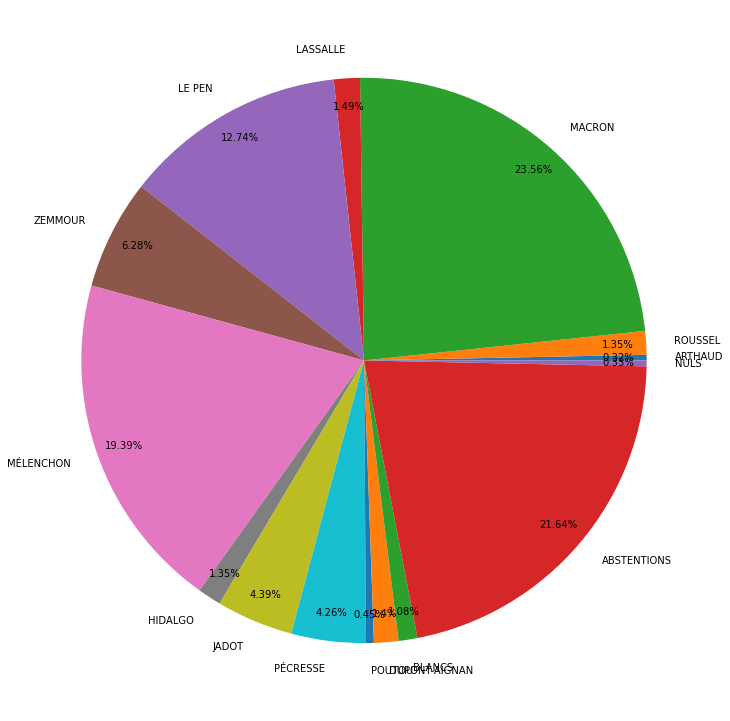

In [43]:
depObs = 'Rhône'

camembertDepObs(depObs)

In [46]:
def dep_prct(tableau, booleen):
      tab = df[['Code du département','Libellé du département', tableau]]
      frame1 = pd.DataFrame(tab)
      tab2 = frame1.groupby(["Code du département","Libellé du département"]).mean()
      res = tab2.sort_values(by=tableau,ascending=booleen)

      return res.head(20)

In [47]:
def dep(tableau, booleen):
      tab = df[['Code du département','Libellé du département', tableau]]
      frame1 = pd.DataFrame(tab)
      tab2 = frame1.groupby(["Code du département","Libellé du département"]).sum()
      res = tab2.sort_values(by = tableau, ascending = booleen)

      return res.head(20)

In [56]:
dep_prct('% Voix/Ins.MJL', False)

,,% Voix/Ins.MJL
Code du département,Libellé du département,
93,Seine-Saint-Denis,33.204836
94,Val-de-Marne,26.587269
ZA,Guadeloupe,23.906081
94,Val-de-Marne,23.333376
95,Val-d'Oise,23.157016
75,Paris,22.732333
9,Ariège,22.067836
ZB,Martinique,21.207718
ZS,Saint-Pierre-et-Miquelon,20.777500
